MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

**Importing Libraries**

In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from keras.preprocessing.image import ImageDataGenerator

**Loading Dataset**

In [2]:
train  = pd.read_csv('train.csv')
test   = pd.read_csv('test.csv')

**Data Exploration**

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [31]:
# Extracting and reshaping the pixel values of the first image in the training dataset
# The image is represented as a 28x28 array of pixel values
number = np.array(train.iloc[0,1:]).reshape(28,28)
number[10]


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  93, 254, 253, 238, 170,  17,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=int64)

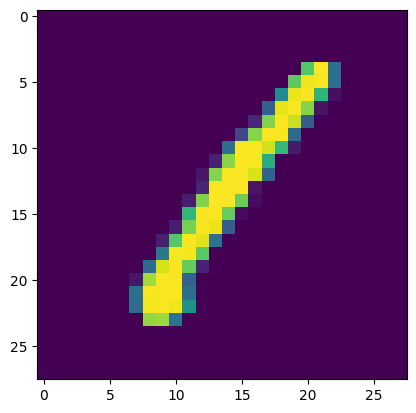

In [33]:
plt.imshow(number)

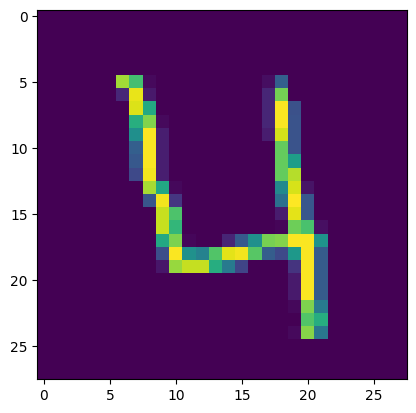

In [9]:
number4 = np.array(train.iloc[3,1:]).reshape(28,28)
plt.imshow(number4)

(array([691.,   7.,  18.,   4.,   5.,   5.,   7.,  12.,   9.,  26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

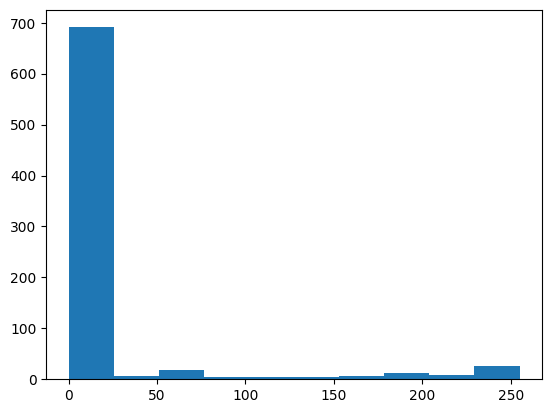

In [13]:
arr = train.iloc[3,1:]
plt.hist(arr)

In [14]:
arr.describe()

count    784.000000
mean      19.164541
std       57.787051
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      255.000000
Name: 3, dtype: float64

**Missing Values**

In [15]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [16]:
x = np.array(train)
y = np.array(test)

In [17]:
X_train = x[:,1:]
Y_train = x[:,0]
X_test = y

**Feature Engineering**

In [35]:
X_train = X_train.reshape(-1,28,28,1)


In [21]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    height_shift_range = 0.1,
    zoom_range  = 0.1,
    shear_range = 0.1,
    )
datagen.fit(X_train)

In [22]:
X_train = X_train.reshape(-1,784)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**KNN Model**

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [25]:
int(knn.predict(X_test[60].reshape(1,-1)))

4

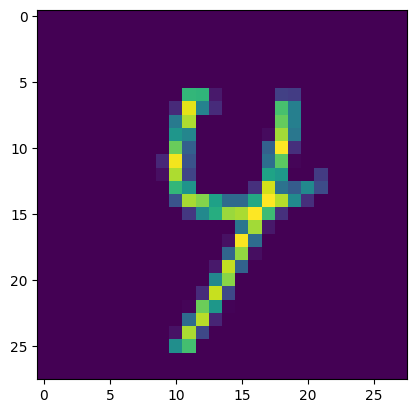

In [26]:
num = np.array(test.iloc[60,:]).reshape(28,28)
plt.imshow(num)

In [27]:
int(knn.predict(X_test[62].reshape(1,-1)))

7

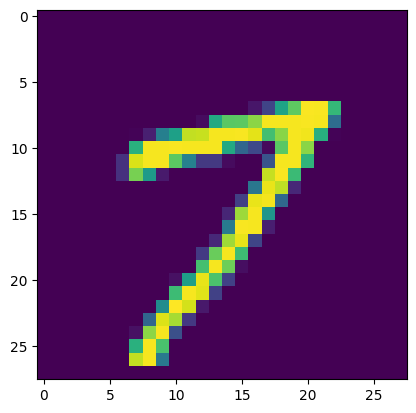

In [29]:
num = np.array(test.iloc[62,:]).reshape(28,28)
plt.imshow(num)